# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

In [1]:
from sklearn.metrics import normalized_mutual_info_score as nmi_score

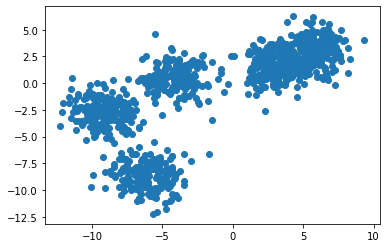

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
#X.sort()
plt.scatter(X[:,0], X[:,1])

In [438]:
class k_means:
    def __init__(self,k,stop, init_k_centers = None):
        self.k = k
        self.inertia = []
        self.stop = stop
        self.init_k_centers = init_k_centers
        self.k_centers = None
        
        
    #теорема Пифагора на максималках
    def _evklid_metric(self,p,q):
        try:
            len(p)
        except TypeError:
            p, q = np.array([p]), np.array([q])
        return np.sum([ ( p[i] - q[i])**2 for i in range(0,len(q)) ])**0.5  

    #инициализируем центры кластеров 
    def _init_k_centers(self,k):
        ind_nums = np.arange(0,len(X)-1,len(X)//k) #делим число индексов на k и выбираем их номера
        indexes = np.mean(X, axis = 1).argsort()[ind_nums] #усредняем признаки и сортируем, выводим их индексы и выбриаем нужные
        return X[indexes]   
    
      
    #измеряем расстояние от точек до центров кластеров и относим их кластерам
    def _assign_cluster(self,X,k_centers):
        for j, x_point in enumerate(X[:,:-1]):
            k_x = -1
            dist = np.inf
            for i, center_point in enumerate(k_centers):
                metr = self._evklid_metric(center_point, x_point)
                if metr < dist:
                    k_x = i
                    dist = metr
            X[j][-1] = k_x
        return X
       
        
    def train(self,X):
        try:    
            if self.init_k_centers == None:
                self.init_k_centers = self._init_k_centers(self.k)
        except ValueError:
            self.init_k_centers = np.array(self.init_k_centers)
            if len(self.init_k_centers) != self.k:
                raise ValueError('length of k-centers list must be equal k')
            if self.init_k_centers.shape != (self.k, X.shape[1]):
                raise IndexError('invalid coordinates dimension')         
        k_centers = self.init_k_centers
        self.inertia.append(k_centers)
        E = np.mean(k_centers , axis = 1)
        #добавляем новый столбец для меток кластеров
        X = np.hstack((X,-np.ones(len(X)).reshape(-1,1)))
        i = 0
        while True:       
            i += 1
            X = self._assign_cluster(X,k_centers)
            k_centers = np.array([np.mean(X[X[:,-1] == i][:,:-1],axis = 0 ) for i in range(self.k)])
            new_E = np.mean(k_centers , axis = 1)
            self.inertia.append(k_centers)
            if sum((E-new_E)**2) < self.stop:
                print(f'iterarions: {i}')
                self.k_centers = k_centers
                break
            E = new_E
        self.inertia = np.array(self.inertia)
        return X[:,:-1], X[:,-1] #x, y

In [443]:
random_points = (np.random.rand(4,2)*2-1)*7

In [456]:
kmeans = k_means(4,0.001,random_points)

In [457]:
clastered_X, clastered_Y = kmeans.train(X)

iterarions: 6


In [455]:
kmeans.init_k_centers

array([[-2.67243615, -5.53132295],
       [-3.84119156,  5.27532628],
       [-5.59629737,  2.36745044],
       [ 6.78277363,  6.93494496]])

In [448]:
kmeans.k_centers

array([[-6.09342472, -8.63869903],
       [ 1.49763304,  1.29527451],
       [-6.98935925, -1.25597703],
       [ 5.47015818,  2.92932333]])

In [449]:
nmi_score(Y,clastered_Y)

0.7473609978639909

In [450]:
kmeans.k_centers[:,0],kmeans.k_centers[:,1]

(array([-6.09342472,  1.49763304, -6.98935925,  5.47015818]),
 array([-8.63869903,  1.29527451, -1.25597703,  2.92932333]))

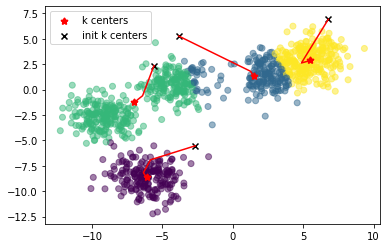

In [452]:
plt.scatter(X[:,0], X[:,1], c = clastered_Y, alpha = 0.5)
plt.scatter(kmeans.k_centers[:,0], kmeans.k_centers[:,1], c = 'r',marker =  '*', linewidths = 2, label = 'k centers')
for i in range(kmeans.k):
    plt.plot(kmeans.inertia[:,i,0],kmeans.inertia[:,i,1], 'r')
plt.scatter(kmeans.init_k_centers[:,0], kmeans.init_k_centers[:,1], c = 'k',marker =  'x', label = 'init k centers')
plt.legend()
plt.show()

# Машины какие-то

In [156]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

In [157]:
df = pd.read_csv('C:/data.csv', encoding='cp1251')

In [161]:
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [162]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [164]:
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])

In [165]:
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [168]:
method = KMeans(n_clusters=10, n_jobs=-1)
method.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [172]:
def cls_info(df):
    for k_num in range(method.n_clusters):
        print('--------------- Кластер', k_num+1, '---------------')  
        claster =  df[method.labels_ == k_num]       
        print('Год', claster['Год'].mean())       
        print('Пробег', claster['Пробег'].mean())
        print('Объём', claster['Объем'].mean())
        print('Мощность', claster['Мощность'].mean())
        print('Цена', claster['Цена'].mean())
        print('')
        print(claster['Привод'].value_counts().head(1))
        print('')
        print(claster['Марка'].value_counts().head(2))
        print('')
        print(claster['Кузов'].value_counts().head(2))
        print('')
        print(claster['КПП'].value_counts().head(2))
        print('---------------------------')
        print('')

In [173]:
cls_info(df)

--------------- Кластер 1 ---------------
Год 1998.4998561978716
Пробег 245511.02214552776
Объём 1885.5910267471959
Мощность 124.20822548173713
Цена 204030.65171124533

передний    2368
Name: Привод, dtype: int64

Toyota    782
Nissan    465
Name: Марка, dtype: int64

седан        1810
универсал     432
Name: Кузов, dtype: int64

автомат     2044
механика    1258
Name: КПП, dtype: int64
---------------------------

--------------- Кластер 2 ---------------
Год 2005.7513740704817
Пробег 152248.1619786615
Объём 1522.065955383123
Мощность 94.9833494988684
Цена 205473.76430649855

передний    5992
Name: Привод, dtype: int64

ВАЗ     2059
Ford     577
Name: Марка, dtype: int64

седан      2854
хэтчбек    2680
Name: Кузов, dtype: int64

механика    5294
автомат      623
Name: КПП, dtype: int64
---------------------------

--------------- Кластер 3 ---------------
Год 2009.0172038758158
Пробег 103567.28791773779
Объём 1538.006723353767
Мощность 100.53193593039352
Цена 310907.68894601543

пере